The dataset comprised of records from 109 different models of
cars under five parameters:
1. cyl: Number of cylinders,
2. origin: Car origin, 1 = US; 2 = Europe; 3 = Asia, an integer vector,
3. turn: Turn diamater, a numeric vector,
4. hp Horsepower, a numeric vector,
5. mpg Miles per gallon in city driving, a numeric vector.

A analysis is done to explore the importance and imapct of each variable with respect to Miles per gallon.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

#### Exploring the relationships between these five variables using the pairplot 

In [49]:
df3=pd.read_csv("dataset3.csv")
df3=df3.drop(['Unnamed: 0'], axis=1)

In [50]:
df3.head(2)

,cyl,origin,turn,hp,mpg
0,4,3,32.1,118,25
1,6,3,36.1,161,18


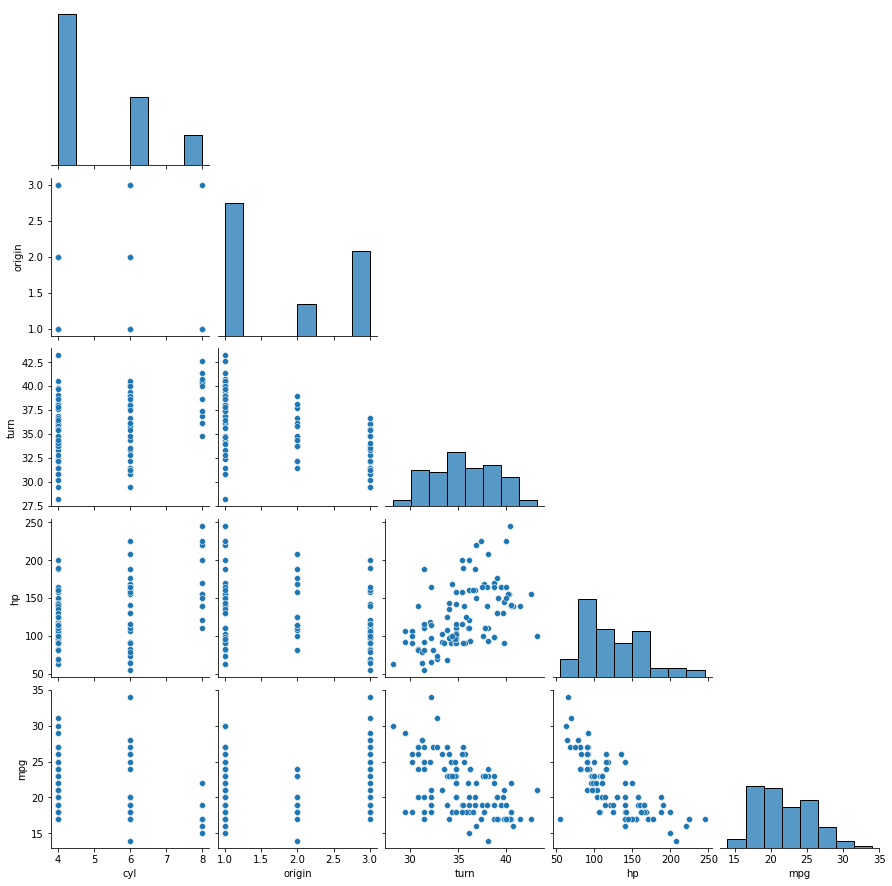

In [51]:
sns.pairplot(df3,corner=True)

Looking at the diagram, we can see 'cyl', origin are categorical data. 'tur' and 'mpg' has a linear relationship with positive slope whereas 'hp' and 'turn' has a linear relatiohnship with negative slope. <br>
The distribution of turn resembles a normal distribution. Similarly 'mpg' distribution is also similar to a bell shaped with a little skewness to the right. In contrast, 'hp' is heavealy skewed to right.

#### Investigating relationship

Since there are categorical as well as continuous variable, Phi_K coefficient is used for exploring relationship between variables

In [52]:
df3

,cyl,origin,turn,hp,mpg
0,4,3,32.1,118,25
1,6,3,36.1,161,18
2,4,2,33.8,108,23
3,6,2,34.4,168,18
4,6,2,37.7,168,18
...,...,...,...,...,...
104,4,2,31.5,81,24
105,4,2,34.4,100,23
106,4,2,32.2,114,19
107,4,2,32.2,114,20


interval columns not set, guessing: ['cyl', 'origin', 'turn', 'hp', 'mpg']


[Text(0.5, 1.0, 'PhiK')]

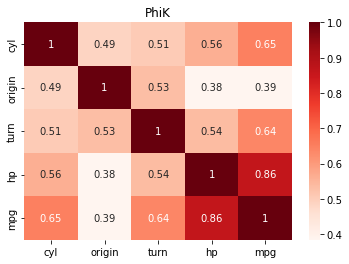

In [53]:
phik=df3.phik_matrix()
sns.heatmap(phik,cmap='Reds',annot=True).set(title="PhiK")

We can see from the heatmap:
1. 'hp' and 'mpg' have high correlation
2. 'mpg' has more than 0.6 correlation coefficient with 'cyl' and 'turn'


#### Impact on Mgp

In [54]:
X=df3.drop('mpg',axis=1)
y=df3['mpg']
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()
model.rsquared


0.6068598640310499

In [55]:
model.params

const     40.179644
cyl       -0.120193
origin    -0.246701
turn      -0.281646
hp        -0.061290
dtype: float64

4

In [56]:
model.pvalues

const     2.420225e-19
cyl       5.392071e-01
origin    4.450341e-01
turn      6.738075e-03
hp        2.933445e-13
dtype: float64

The most significant variables are 'hp' and 'turn'
<br>
'cyl' and 'origin' are not stastically signicant within a confidence of 95% <br>
Now removing insignificant variables and retraining model

In [57]:
X=df3.drop(['mpg','cyl','origin'],axis=1)
y=df3['mpg']
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     80.57
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.29e-22
Time:                        17:21:51   Log-Likelihood:                -252.61
No. Observations:                 109   AIC:                             511.2
Df Residuals:                     106   BIC:                             519.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2642      2.654     14.417      0.000      33.002      43.526
turn          -0.2510      0.084     -2.997      0.003      -0.417      -0.085
hp            -0.0631      0.007     -9.107      0.000      -0.077      -0.049
==============================================================================
Omnibus:                       12.000   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               25.976
Skew:                          -0.335   Prob(JB):                     2.29e-06
Kurtosis:                       5.296   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality check for residuals

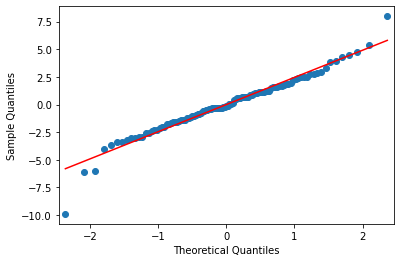

In [58]:
y_pred=model.predict(x)
res=y-y_pred
ax=qqplot(res, line='s')

The qqplot illustrates that except for few outliers the residuals are normally distributed

#### Step-wise regression

In [60]:
import mistat

In [61]:
outcome='mpg'
all_vars=['cyl','origin','turn','hp']
included,model=mistat.stepwise_regression(outcome,all_vars,df3)

Step 1 add - (F: 141.60)  hp
Step 2 add - (F: 8.98)  hp turn


In [62]:
model.rsquared

0.6032077228231238

Since the rsquared value is same (0.6) for both the regression model (from step 4 and step 6) there is no difference in regression performance.